# Chapter 4 : Statistics and Linear Algebra

In [1]:
#load watermark
%load_ext watermark
%watermark -a 'Gopala KR' -u -d -v -p watermark,numpy,pandas,matplotlib,nltk,sklearn,tensorflow,theano,mxnet,chainer,seaborn,keras,tflearn,bokeh,gensim

/srv/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Using TensorFlow backend.
/srv/venv/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))


Gopala KR 
last updated: 2018-02-20 

CPython 3.6.3
IPython 6.2.1

watermark 1.6.0
numpy 1.14.0
pandas 0.22.0
matplotlib 2.1.2
nltk 3.2.5
sklearn 0.19.1
tensorflow 1.5.0
theano 1.0.1
mxnet 1.1.0
chainer 3.4.0
seaborn 0.8.1
keras 2.1.4
tflearn n
bokeh 0.12.14
gensim 3.3.0


/srv/venv/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


# basic descriptive statistics

In [2]:
%matplotlib inline
import numpy as np
from scipy.stats import scoreatpercentile
import pandas as pd

data = pd.read_csv("co2.csv", index_col=0, parse_dates=True)

co2 = np.array(data.co2)

print("The statistical valus for amounts of co2 in atmosphere : \n")
print("Max method : ", co2.max())
print("Max function : ", np.max(co2))

print("Min method : ", co2.min())
print("Min function : ", np.min(co2))

print("Mean method : ", co2.mean())
print("Mean function : ", np.mean(co2))

print("Std method : ", co2.std())
print("Std function : ", np.std(co2))

print("Median : ", np.median(co2))
print("Score at percentile 50 : ", scoreatpercentile(co2, 50))

The statistical valus for amounts of co2 in atmosphere : 

Max method :  366.84
Max function :  366.84
Min method :  313.18
Min function :  313.18
Mean method :  337.0535256410256
Mean function :  337.0535256410256
Std method :  14.950221626197369
Std function :  14.950221626197369
Median :  335.17
Score at percentile 50 :  335.17


# Linear Algebra

## Inverting a matrix

In [3]:
A = np.mat("2 4 6;4 2 6;10 -4 18")

In [4]:
print("A\n", A)

A
 [[ 2  4  6]
 [ 4  2  6]
 [10 -4 18]]


In [5]:
inverse = np.linalg.inv(A)
print("inverse of A\n", inverse)

inverse of A
 [[-0.41666667  0.66666667 -0.08333333]
 [ 0.08333333  0.16666667 -0.08333333]
 [ 0.25       -0.33333333  0.08333333]]


In [6]:
print("Check\n", A * inverse)

Check
 [[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.22044605e-16  1.00000000e+00  0.00000000e+00]
 [-8.88178420e-16  8.88178420e-16  1.00000000e+00]]


In [7]:
print("Error\n", A * inverse - np.eye(3))

Error
 [[-1.11022302e-16  0.00000000e+00  0.00000000e+00]
 [-2.22044605e-16  4.44089210e-16  0.00000000e+00]
 [-8.88178420e-16  8.88178420e-16 -1.11022302e-16]]


## Solving linear systems

In [8]:
A = np.mat("1 -2 1;0 2 -8;-4 5 9")
print("A\n", A)
b = np.array([0, 8, -9])
print("b\n", b)

A
 [[ 1 -2  1]
 [ 0  2 -8]
 [-4  5  9]]
b
 [ 0  8 -9]


In [9]:
x = np.linalg.solve(A, b)
print("Solution", x)

Solution [29. 16.  3.]


In [10]:
print("Check\n", np.dot(A , x))

Check
 [[ 0.  8. -9.]]


## Finding eigenvalues and eigenvectors 

In [11]:
A = np.mat("3 -2;1 0")
print("A\n", A)

print("Eigenvalues", np.linalg.eigvals(A))

eigenvalues, eigenvectors = np.linalg.eig(A)
print("First tuple of eig", eigenvalues)
print("Second tuple of eig\n", eigenvectors)

for i in range(len(eigenvalues)):
   print("Left", np.dot(A, eigenvectors[:,i]))
   print("Right", eigenvalues[i] * eigenvectors[:,i])

A
 [[ 3 -2]
 [ 1  0]]
Eigenvalues [2. 1.]
First tuple of eig [2. 1.]
Second tuple of eig
 [[0.89442719 0.70710678]
 [0.4472136  0.70710678]]
Left [[1.78885438]
 [0.89442719]]
Right [[1.78885438]
 [0.89442719]]
Left [[0.70710678]
 [0.70710678]]
Right [[0.70710678]
 [0.70710678]]


# random numbers

## binomial distribution

0 9


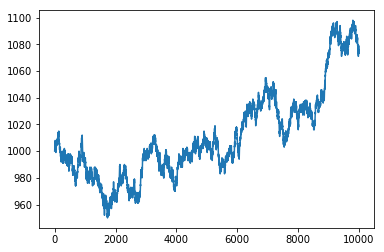

In [12]:
import numpy as np
from matplotlib.pyplot import plot, show

cash = np.zeros(10000)
cash[0] = 1000
outcome = np.random.binomial(9, 0.5, size=len(cash))

for i in range(1, len(cash)):

   if outcome[i] < 5:
      cash[i] = cash[i - 1] - 1
   elif outcome[i] < 10:
      cash[i] = cash[i - 1] + 1
   else:
      raise AssertionError("Unexpected outcome " + outcome)

print(outcome.min(), outcome.max())

plot(np.arange(len(cash)), cash)
show()

## normal distribution

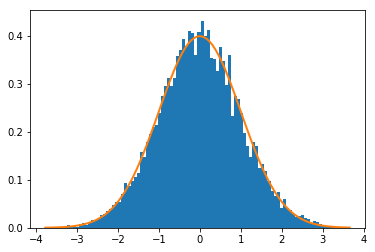

In [13]:
import numpy as np
import matplotlib.pyplot as plt

N=10000

normal_values = np.random.normal(size=N)
dummy, bins, dummy = plt.hist(normal_values, int(np.sqrt(N)), normed=True, lw=1)
sigma = 1
mu = 0
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),lw=2)
plt.show()

## normality test with scipy

In [14]:
import numpy as np
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import normaltest

flutrends = np.loadtxt("goog_flutrends.csv", delimiter=',', usecols=(1,), skiprows=1, converters = {1: lambda s: float(s or 0)}, unpack=True)
N = len(flutrends)
normal_values = np.random.normal(size=N)
zero_values = np.zeros(N)

print("Normal Values Shapiro", shapiro(normal_values))
#print("Zeroes Shapiro", shapiro(zero_values))
print("Flu Shapiro", shapiro(flutrends))

print("Normal Values Anderson", anderson(normal_values))
#print("Zeroes Anderson", anderson(zero_values))
print("Flu Anderson", anderson(flutrends))

print("Normal Values normaltest", normaltest(normal_values))
#print("Zeroes normaltest", normaltest(zero_values))
print("Flu normaltest", normaltest(flutrends))

Normal Values Shapiro (0.9955846071243286, 0.09155819565057755)
Flu Shapiro (0.9351990818977356, 2.2945883254311397e-15)
Normal Values Anderson AndersonResult(statistic=0.8271577447956133, critical_values=array([0.572, 0.652, 0.782, 0.912, 1.085]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Flu Anderson AndersonResult(statistic=8.258614154768793, critical_values=array([0.572, 0.652, 0.782, 0.912, 1.085]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Normal Values normaltest NormaltestResult(statistic=5.60382491394232, pvalue=0.06069387713232389)
Flu normaltest NormaltestResult(statistic=99.64373336356954, pvalue=2.304826411536872e-22)


# Numpy masked array

/srv/venv/lib/python3.6/site-packages/scipy/misc/common.py:199: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  face = fromstring(data, dtype='uint8')


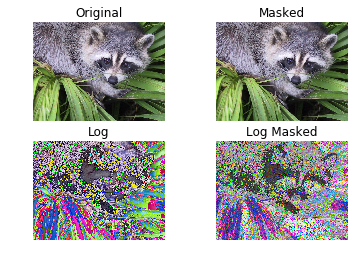

In [15]:
import numpy
import scipy
import matplotlib.pyplot as plt

face = scipy.misc.face()

random_mask = numpy.random.randint(0, 2, size=face.shape)

plt.subplot(221)
plt.title("Original")
plt.imshow(face)
plt.axis('off')

masked_array = numpy.ma.array(face, mask=random_mask)

plt.subplot(222)
plt.title("Masked")
plt.imshow(masked_array)
plt.axis('off')

plt.subplot(223)
plt.title("Log")
plt.imshow(numpy.ma.log(face).astype("float32"))
plt.axis('off')


plt.subplot(224)
plt.title("Log Masked")
plt.imshow(numpy.ma.log(masked_array).astype("float32"))
plt.axis('off')

plt.show()

# Disregarding negative and extreme values

Triples [ 0  3  6  9 12 15 18 21 24 27] ...
Signs [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] ...
Signs [-1.  1.  1. -1.  1.  1. -1.  1.  1. -1.] ...
Masked logs [-- 14.970818190308929 15.830413578506539 -- 13.458835614025542
 15.319587954740548 -- 15.648092021712584 13.864300722133706 --] ...
Inside [3750000.0 3175000.0 7500000.0 3000000.0 700000.0 4500000.0 3000000.0
 6250000.0 1050000.0 4600000.0] ...


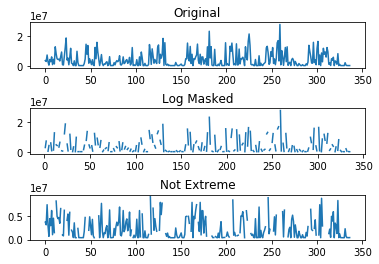

In [16]:
import numpy as np
from datetime import date
import sys
import matplotlib.pyplot as plt

salary = np.loadtxt("MLB2008.csv", delimiter=',', usecols=(1,), skiprows=1, unpack=True)
triples = np.arange(0, len(salary), 3)
print("Triples", triples[:10], "...")

signs = np.ones(len(salary))
print("Signs", signs[:10], "...")

signs[triples] = -1
print("Signs", signs[:10], "...")

ma_log = np.ma.log(salary * signs)
print("Masked logs", ma_log[:10], "...")

dev = salary.std()
avg = salary.mean()
inside = np.ma.masked_outside(salary, avg - dev, avg + dev)
print("Inside", inside[:10], "...")

plt.subplot(311)
plt.title("Original")
plt.plot(salary)

plt.subplot(312)
plt.title("Log Masked")
plt.plot(np.exp(ma_log))

plt.subplot(313)
plt.title("Not Extreme")
plt.plot(inside)

plt.subplots_adjust(hspace=.9)

plt.show()